# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Моя задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

Цель исследования:
1. Определить параметры объектов недвижимости, которые оказывают наибольшее влияние на ценообразование;
2. Определить как быстро продавались квартиры в течение рассматриваемого периода времени;
3. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра;
4. Изучить как меняется цена на недвижимость в Санкт-Петербурге по мере удаления от исторической части города.

Ход исследования:
Данные о недвижимости я получу из файла `/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, необходимо выполнить обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. На этапе обработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы и приступлю к проведению исследовательского анализа.

Таким образом, мое исследование пройдет в пять этапов*
- Обзор данных;
- Предобработка данных;
- Расчеты и добавление результатов в таблицу;
- Изучение целей исследования;
- Написание общего вывода.

### Откройте файл с данными и изучите общую информацию. 

**1.1 Импортируем библиотеку pandas и прочтем датафрейм с данными сервиса Яндекс.Недвижимость**

In [1]:
import pandas as pd

data=pd.read_csv('C:/Users/FORTREZZA/Desktop/Курс Дата-аналитика (Яндекс)/3. Исследовательский анализ данных/3. Проектная работа/real_estate_data.csv',sep='\t') 
#при первом исполнении метода head() выяснилось, что данные отображаются некорректно, 
#поэтому сразу укажем разделитель sep для нормального отображения датафрейма

**1.2 Выведем первые 20 строчек датафрейма `data`**

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

По количеству строк можно сделать вывод, что детализация информации по каждому объекту очень сильно отличается между объявлениями

In [4]:
data.columns = data.columns.str.lower() #среди заголовков встречается строка с заглавной буквой (cityCenters).
#приведем все строки к нижнему регистру

In [5]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**1.3 Построим общую гистограмму для всех числовых столбцов таблицы**

In [6]:
import matplotlib.pyplot as plt

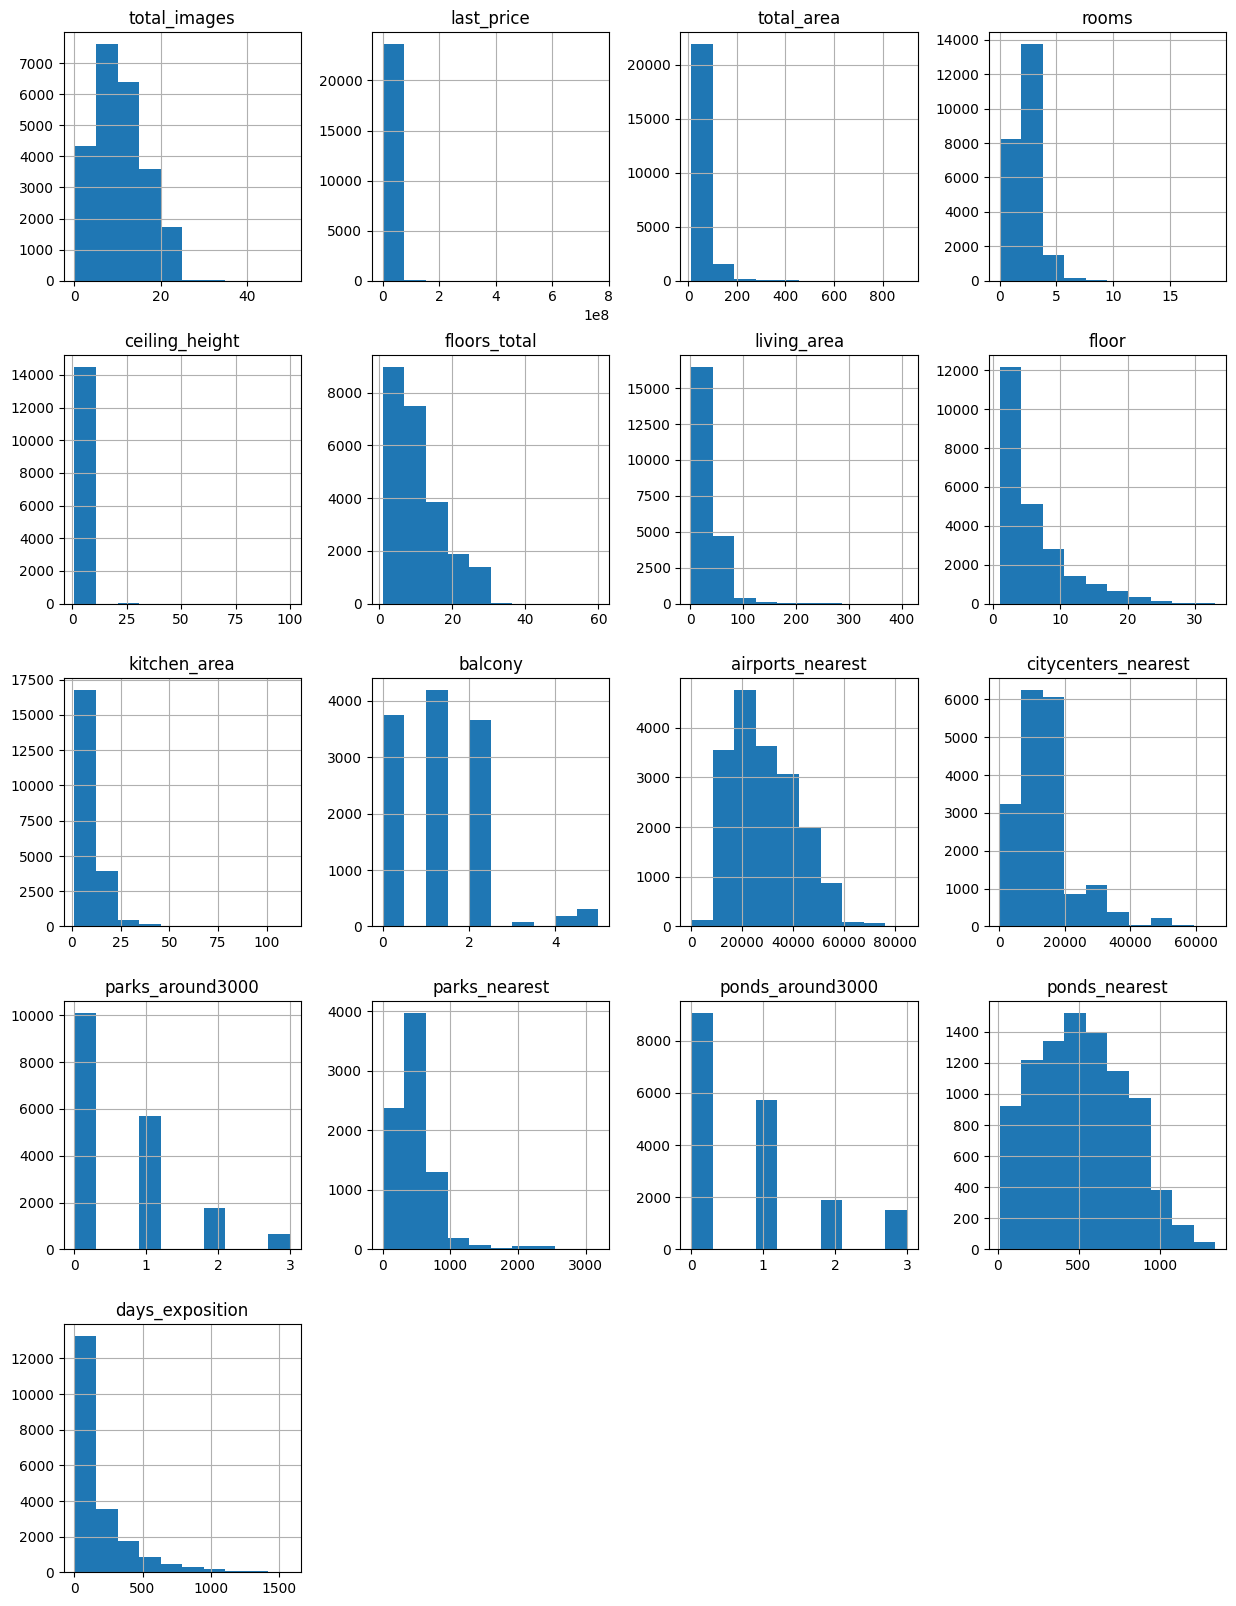

In [7]:
data.hist(figsize=(15, 20))
plt.show();

Какие наблюдения можно сделать по гистограммам необработанных данных:
1. `total_images`: количество фотографий, прилагаемых к объявлению, не превышает 25. У подавляющего большинства объявлений - 10 фото.
2.`last_price`: по этому столбцу каких-либо выводов сделать нельзя.
3. `total_area`: подавляющее большинство объявлений - это недвижимость общей площадью до 100 кв.м. Но есть и объявления около 200 кв.м (премиум-сегмент?)
4. `rooms`: большинство обявлений - это одно- и двухкомнатные квартиры. Изредка встречаются и бОльшие квартиры.
5. `ceiling_height`: по данной гистограмме выводов сделать нельзя. Следует поменять масштаб по оси x, потому что высота потолков не может сильно отличаться у жилой недвижимости.
6. `floors_total`: большинство объявлений - это квартиры в зданиях высотой до 10 этажей (старый фонд?). Но немало и высотной застройки до 30 этажей (новостройки?) 
7. `living_area`: в целом гистограмма похожа на оную общей площади.
8. `floor`: в подавляющем большинстве объявлений квартиры располагаются до 10 этажа.
9. `kitchen_area`: площадь кухни в большинстве случаев составляет 10 кв.м, реже - 25 кв.м. Но есть объявления и 50 кв.м. (может это студии или квартиры со свободной планировкой?)
10. `balcony`: в большинстве случаев балконы либо отсутствуют, либо есть в количестве одного или двух. Однако встречаюся аномалии в виде трех-, четырех- и пятибалконных квартир. Может быть это выбросы данных? Однако следует иметь в виду, что заполненных строк с количеством балконов чуть ли не в 2 раза меньше по сравнению с длиной датафрейма.
11. `airports_nearest`: для большинства позиций ближайший аэропорт располагается в диапазоне от 10 до 60 км, что является нормой.
12. `cityCenters_nearest`: большинство объявлений - квартиры в 20 км от центра города и ближе (полагаю, недвижимость в Санкт-Петербурге), но встречаются и более далекие объекты (наверное в Ленинградской области).
13. `parks_around3000`: большинство объектов либо не имеет парков в радиусе 3 км, либо такой парк всего один.
14. `parks_nearest`: больше всего объектов находится на расстоянии 4 км от ближайшего парка. Впрочем к этой информации тоже следует относиться критически, поскольку эта строка заполняется очень редко.
15. `ponds_around3000`: как правило, водоёма рядом либо нет, либо всего один. Реже - больше.
16. `ponds_nearest`: чаще всего водоём располагается на расстоянии 1-1,5 км от объекта. Но и здесь следует относиться скептически, посколько заполяют эту строку редко.
17. `days_exposition`: в большинстве случаев недвижимость реализуется в течение 1 года.

### Предобработка данных

**2.1 Удаление пропусков**

In [8]:
data.isna().sum() #посчитаем количество пропусков в данных по столбцам

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***2.1.1 Устранение пропусков в столбце `ceiling_height`***

Начнем по порядку. Для начала избавимся от пропусков в столбце 'ceiling_height'. Выведем на экран все уникальные значения высоты потолка.

In [9]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Большинство значений укладывается в диапазон от 2,5 м (минимум в действующем СП) до 6 м (такая высота может встречаться в домах дореволюционной застройки). Однако есть и выбросы: высота потолков более 10 м и даже 100 м. Вероятные причины: неправильно занесенные данные (перепутали с площадью) либо ошиблись на порядок. Есть выбросы и в обратную сторону: высота потолков менее 2 м. Посчитаем, сколько таких объявлений.

In [10]:
len(data[data['ceiling_height'] < 2]) #объявлений с высотой потолков до 2 м

3

In [11]:
len(data[data['ceiling_height'] > 6]) #объявлений с высотой потолков более 6 м

29

В сумме 31 объявление - незначительное количество, поэтому на медиану эти значения большого влияния не окажут. Вычислим медианное значение и подставим его в места пропусков.

In [12]:
data['ceiling_height'].median()

2.65

Медиана высоты потолков равна 2,65 м - похоже на правду.

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #заполняем пропуски

***2.1.2 Устранение пропусков в столбце `floors_total`***

В следующем столбце 'floors_total' данные отсутствуют в 86 случаях. Вероятно, тоже потому что при размещении автор просто не ввел эту информацию. Поступим аналогичным образом - заполним медианным значением.

In [14]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

***2.1.3 Устранение пропусков в столбцах `ceiling_height` и `kitchen_area`***

Для столбца 'living_area' заполнить пропуски медианным значением по всему датафрейму уже не получится, поскольку эти значения зависят от количества комнат. Поэтому пройдемся циклом по датафрейму, выявим средние значения в зависимости от количества комнат и запишем их в соответствующие строки с пропусками. Аналогично допустимо выполнить и для столбца 'kitchen_area'.

In [15]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].mean()

In [16]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area'].mean()

После заполнения пропусков в kitchen_area таким методом все еще остается 197 объявлений с пропусками. Можно предположить, что это объекты, где количество комнат равно '0'. Такими могут быть квартиры-студии или квартиры со свободной планировкой. Проверим эту гипотезу.

In [17]:
data[data['kitchen_area'].isna() & ((data['studio']==True) | (data['open_plan']==True))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.500000,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.000000,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.750000,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.300000,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,18.865246,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.000000,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.000000,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,18.865246,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.000000,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


197 строк - все сходится! Заполним 'kitchen_area' нулями для таких объявлений.

In [18]:
data.loc[((data['studio']==True) | (data['open_plan']==True)), 'kitchen_area'] = (
    data.loc[((data['studio']==True) | (data['open_plan']==True)), 'kitchen_area'].fillna(0)
)

***2.1.4 Устранение пропусков в столбце `is_apartment`***

Столбец 'is_apartment' характеризует, является ли объект апартаментами, то есть нежилой коммерческой недвижимостью, не отличающейся от квартиры. Параметр может принимать значение 'True' либо 'False'. То есть это должен быть булев тип данных. Но обратим внимание, что в датафрейме по умолчанию данный параметр имеет тип "строка". Позже мы это исправим, а пока что заполним пропуски значением 'False'.

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False)

***2.1.5 Устранение пропусков в столбце `balcony`***

В столбце 'balcony' пропуски связаны, скорее всего, с отсутствием балкона, поэтому заполним их значением '0'.

In [20]:
data['balcony'] = data['balcony'].fillna(0)

***2.1.6 Устранение пропусков в столбце `locality_name`***

В столбце 'locality_name' авторы по неизвестной причине не указали населенный пункт. К сожалению, исправить данную ситуацию мы не можем (не обзванивать же каждого автора?), поэтому эти строки придется удалить. Благо, их всего 49!

In [21]:
data = data[data['locality_name'].notna()]

***2.1.7 Устранение пропусков в столбцах `airports_nearest` и `citycenters_nearest`***

Пропуски в столбцах 'airports_nearest' и 'citycenters_nearest', скорее всего, возникли по все той же причине: автор объявления не ввел эту информацию. Решить можно следующим образом: взять среднее значение в зависимости от населенного пункта. Это даст относительно точное значение для населенных пунктов в Ленинградской области и не слишком точное - для Санкт-Петербурга (здесь придется сделать допущение). Однако этот цикл следует писать после выявления неявных дубликатов.

***2.1.8 Устранение пропусков в столбцах `parks_around3000` и `ponds_around3000`***

В столбцах 'parks_around3000' и 'ponds_around3000' пропуск связан, скорее всего, с тем, что парков и водоёмов вблизи объекта нет. Поэтому пропуски в столбцах можно заменить нулями. Взглянув на датафрейм, можно увидеть еще одну закономерность: в столбцах 'parks_nearest' и 'ponds_nearest' значения пропущены тогда, когда в 'parks_around3000' и 'ponds_around3000' стоят или пропуски, или нулевые значения. Для этих столбцов пропуски следует оставить.

In [22]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

***2.1.9 Устранение пропусков в столбце `days_exposition`***

В столбце 'days_exposition' пропуски могут быть вызваны разве что техническим сбоем. Заполнить такие строки можно средним значением, применив цикл, аналогичный расчету пропущенных значений площадей. Как правило, скорость реализации недвижимости похожа для объектов с одинаковым количеством комнат.

In [23]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['days_exposition'].isna()), 'days_exposition'] = \
    data.loc[(data['rooms'] == t), 'days_exposition'].mean()

In [24]:
data.isna().sum() #проверяем пропуски в датафрейме

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
citycenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

В первом приближении от пропусков избавились: с одной парой столбцов разберемся чуть позже, во второй паре принимаем решение оставить пропуски.

**2.2 Изменение типов данных**

В датафрейме есть несколько столбцов, для которых следует изменить тип данных:
- Дату публикации следует представить в календарном типе данных для удобства работы;
- Этажность дома ('floors_total') следует придать тип int, поскольку этаж 9 3/4 бывает только в мире Гарри Поттера;
- Количество балконов ('balcony') также должно быть int, ибо бывает бутылка кефира и пол батона, но не бывает пол балкона. Это же относится и к количеству парков и водоёмов;
- Количество дней до снятия публикации тоже переведем в int. Это может пригодится в дальнейшем при расчете средних и медианных значений (чтоб не округлять).

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['last_price'] = data['last_price'].astype(int)

In [26]:
data.info() #проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Все корректно.

**2.3 Устранение неявных дубликатов**

In [27]:
data['locality_name'].unique() #выводим все уникальные значения в столбце с наименованием населенного пункта

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Очевидны дубликаты: "посёлок" и "поселок", "посёлок/поселок городского типа" и т.д. Самым простым решением будет удалить тип населенного пункта в строке, оставив лишь название. Напишем для этого цикл.

In [28]:
types = ['деревня ','городской посёлок ','садовое товарищество ',
         'посёлок городского типа ','поселок городского типа ','село ','городской посёлок ',
         'садоводческое некоммерческое товарищество ','посёлок при железнодорожной станции ','посёлок станции ',
         'коттеджный поселок ','садовое товарищество ','коттеджный посёлок ','поселок ','посёлок ']
for type in types:
    data['locality_name'] = data['locality_name'].str.replace(type, '')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,25.00000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,204
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,11.00000,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,8.30000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,47.387941,9,False,...,11.30858,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,41.00000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,9.10000,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,14.40000,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000,71.60,2019-04-18,2,2.65,24,31.736849,22,False,...,18.90000,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,173
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,8.81000,0,Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,6.50000,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


**2.4 Устранение пропусков (продолжение)**

Теперь можно вернуться в заполнению пропусков в столбцах 'airports_nearest' и 'citycenters_nearest'.

In [29]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t, 'airports_nearest')].mean()

In [30]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['citycenters_nearest'].isna()), 'citycenters_nearest'] = \
    data.loc[(data['locality_name'] == t), 'citycenters_nearest'].mean()

In [31]:
data.isna().sum() #проверяем результат

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4829
citycenters_nearest      4829
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

Часть значений удалось заполнить, но большая часть пропусков осталась. Это связано с тем, что для ряда населенных пунктов нет информации по расстоянию до аэропорта и центра города. В случае реальной задачи следовало бы вручную заполнить эти пропуски, сверяясь, например, по Яндекс.Картам. В нашем случае оставим эти пропуски.

**2.5 Устранение аномальных значений**

***2.5.1 Устранение аномальных значений в столбце `ceiling_height`***

В столбце `ceiling height` встречаются значения, явно выбивающиеся из основного ряда: 10, 20, 25, 27.5, 32, 100. По этому ряду значений можно предположить, что в некоторых числах есть ошибка в порядке (например, 32 вместо 3,2 м), иные же введены некорректно (например, 100 и 1 м). Поэтому числа в указанном ряду умножим на 0.1, а затем для всего столбца применим фильтр, который оставит строки с адекватными значениями в этом столбце: от 2,5 до 6 м. 

In [32]:
for t in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] > 9), 'ceiling_height'] = \
    data.loc[(data['ceiling_height'] > 9), 'ceiling_height'] * 0.1
data = data.query('2.5 <= ceiling_height < 6')

In [33]:
len(data) #проверяем случайные потери в данных

23566

***2.5.2 Устранение аномальных значений в столбце `rooms`***

В столбце 'value_counts' есть ряд значений, которые вызывают сомнения - это объекты с числом комнат более 7.

In [34]:
data['rooms'].value_counts()

1     8010
2     7888
3     5779
4     1171
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Сопоставим медианные цены в зависимости от количества комнат.

In [35]:
data.groupby('rooms').agg({'last_price':['count','median']})

last_price           
           count     median
rooms                      
0            197    2700000
1           8010    3600000
2           7888    4780000
3           5779    6200000
4           1171    9000000
5            326   14000000
6            105   19000000
7             59   24900000
8             12   23095000
9              8   23750000
10             3   23000000
11             2   25250000
12             1  420000000
14             2   26829500
15             1   65000000
16             1   28500000
19             1   32250000

<AxesSubplot:>

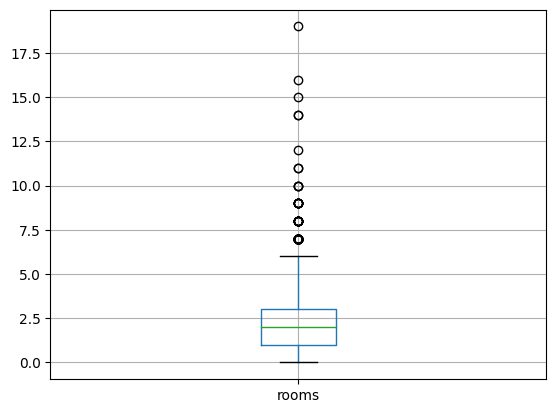

In [36]:
data.boxplot('rooms')

Сводная таблица демонстрирует, что для групп объектов до 7 комнат рост цены имеет вполне ожидаемый линейных характер с реалистичными цифрами. В сегментах от 8 до 19 комнат цена "плавает" в совершенно нереалистично диапазоне, за исключением одного объявления на 12-ти комнатную квартиру. Если мы более подробно рассматрим строки с объявлениями этих подозрительных групп, то увидим, что кое-где встречаются более-менее соответствующие цены. Однако поскольку количество объявлений на объекты с количеством комнат выше 8 крайне мало, то просто устраним эти строки.

In [37]:
data = data.query('rooms <= 7')

In [38]:
len(data) #проверяем случайные потери в данных

23535

***2.5.3 Устранение аномальных значений в столбце `floors_total`***

In [39]:
data['floors_total'].unique() #выводим все уникальные значения

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52])

В полученном ряду два значения вызывают подозрения: 52 и 60 этажей. Выведем на экран эти объявления.

In [40]:
data[data['floors_total'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.4,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,14.0,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45


Как коренной петербуржец могу заявить, что в Кронштадте нет 60-ти этажных небоскрёбов, поэтому удалим эту строку из рассмотрения. В Петербурге тоже нет 52-ти этажных жилых небоскрёбов (Лидер Тауэр имеет 40 этажей, а Лахта Центр еще даже не открыт - и все это офисные здания, в которых апартаменты если и будут, то совсем по другой цене).

In [41]:
data = data.query('floors_total <= 50')

In [42]:
len(data) #проверяем случайные потери в данных

23533

***2.5.4 Устранение аномальных значений в столбце `living_area`***

При вызове описания значений в столбце 'living_area' можно увидеть подозрительное значение 2 кв.м. Но может быть это просто кресло-кровать в микростудии?

In [43]:
data['living_area'].describe()

count    23533.000000
mean        34.236588
std         20.925392
min          2.000000
25%         18.400000
50%         30.300000
75%         42.600000
max        347.500000
Name: living_area, dtype: float64

In [44]:
data[data['living_area']<10] #выведем все строки, где жилая площадь менее 10 кв.м.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000,21.40,2019-02-07,1,2.90,8,8.3,7,False,...,6.300000,0,Санкт-Петербург,27089.0,5791.0,2,488.0,1,286.0,158
680,14,7200000,43.00,2017-10-31,1,2.65,8,9.0,2,False,...,23.000000,0,Санкт-Петербург,23900.0,5232.0,1,2137.0,1,933.0,296
1326,8,8100000,52.00,2017-01-29,2,2.70,25,9.0,15,False,...,32.000000,2,Санкт-Петербург,35555.0,15561.0,0,NaN,1,1180.0,337
2309,10,4200000,62.40,2017-06-15,2,2.60,9,8.4,6,False,...,41.000000,2,Шушары,23662.0,29448.0,0,NaN,0,NaN,111
3242,7,4440000,41.00,2017-07-02,1,2.65,17,3.0,17,False,...,11.000000,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216
4100,17,5300000,34.80,2017-06-19,1,2.70,23,9.0,15,False,...,17.100000,0,Санкт-Петербург,33626.0,13495.0,0,NaN,0,NaN,30
4542,12,3300000,18.00,2018-11-07,1,3.50,5,9.0,2,False,...,9.550118,0,Санкт-Петербург,25157.0,4948.0,2,349.0,1,963.0,9
7312,8,3400000,27.00,2018-02-21,2,2.50,15,9.0,4,False,...,16.000000,0,Санкт-Петербург,50246.0,16444.0,1,617.0,0,NaN,173
8325,9,4800000,52.00,2017-10-25,2,2.65,5,9.0,2,False,...,6.000000,1,Санкт-Петербург,33358.0,13171.0,0,NaN,2,118.0,119
13915,20,6350000,52.00,2018-02-06,2,3.00,6,2.0,2,False,...,9.000000,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91


Подозрение оправдывается! Жилая площадь 2 кв.м. у квартиры общей площадью 52 кв.м - это явно обшибка в данных. На всякий случай удалим все строки, где жилая площадь меньше 10 кв.м.

In [45]:
data = data.query('living_area >= 10')

In [46]:
len(data) #проверяем случайные потери в данных

23508

***2.5.5 Устранение аномальных значений в столбце `last_price`***

В датафрейме можно обнаружить квартиру в Санкт-Петербурге площадью 109 кв.м стоимостью 12190 руб. Конечно же, такую строку следует удалить. Скорее всего, такая цена указана специально с целью привлечения внимания.

In [47]:
data1=data[(data['last_price']<500000)]
data1[['last_price','total_area','locality_name']]

,last_price,total_area,locality_name
5698,450000,42.0,Будогощь
6859,490000,40.0,Старополье
8793,12190,109.0,Санкт-Петербург
9581,450000,43.4,Старополье
10782,490000,29.1,Сланцы
14911,430000,54.0,Свирь
16032,480000,32.0,Сланцы
16219,450000,38.5,Вахнова Кара
16274,440000,40.0,Старополье
17456,430000,30.4,Сланцы


In [48]:
data = data.query('last_price>100000')

In [49]:
len(data) #проверяем случайные потери в данных

23507

***2.6  Устранение явных дубликатов***

In [50]:
data.duplicated().sum()

0

Явные дубликаты не обнаружены.

На этапе вычищения данных датафрейм был сокращен на 192 строки - это неплохой показатель качества данных.

### Посчитайте и добавьте в таблицу новые столбцы

In [51]:
import matplotlib.pyplot as plt

**3.1 Цена одного квадратного метра**

In [52]:
data['price_sqm'] = data['last_price'] / data['total_area']

**3.2 День недели публикации объявления**

In [53]:
for t in data['first_day_exposition'].dt.weekday.unique():
    if t == 0:
        data.loc[(data['first_day_exposition'].dt.weekday == t), 'weekday_exposition'] = 'понедельник'
    elif t == 1:
        data.loc[(data['first_day_exposition'].dt.weekday == t), 'weekday_exposition'] = 'вторник'
    elif t == 2:
        data.loc[(data['first_day_exposition'].dt.weekday == t), 'weekday_exposition'] = 'среда'
    elif t == 3:
        data.loc[(data['first_day_exposition'].dt.weekday == t), 'weekday_exposition'] = 'четверг'
    elif t == 4:
        data.loc[(data['first_day_exposition'].dt.weekday == t), 'weekday_exposition'] = 'пятница'
    elif t == 5:
        data.loc[(data['first_day_exposition'].dt.weekday == t), 'weekday_exposition'] = 'суббота'
    elif t == 6:
        data.loc[(data['first_day_exposition'].dt.weekday == t), 'weekday_exposition'] = 'воскресение'
    else:
        data.loc[(data['first_day_exposition'].dt.weekday == t), 'weekday_exposition'] = 'ошибка'

**3.3 Месяц публикации объявления**

In [54]:
for t in data['first_day_exposition'].dt.month.unique():
    if t == 1:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'январь'
    elif t == 2:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'февраль'
    elif t == 3:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'март'
    elif t == 4:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'апрель'
    elif t == 5:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'май'
    elif t == 6:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'июнь'
    elif t == 7:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'июль'
    elif t == 8:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'август'
    elif t == 9:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'сентябрь'
    elif t == 10:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'октябрь'
    elif t == 11:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'ноябрь'
    elif t == 12:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'декабрь'        
    else:
        data.loc[(data['first_day_exposition'].dt.month == t), 'month_exposition'] = 'ошибка'

**3.4 Год публикации объявления**

In [55]:
data['year_exposition'] = data['first_day_exposition'].dt.year

**3.5 Тип этажа квартиры**

In [56]:
data.loc[(data['floor'] == 1), 'floor_type'] = 'первый'
data.loc[(data['floor'] == data['floors_total']), 'floor_type'] = 'последний'
data.loc[(data['floor'] != 1) &  (data['floor'] != data['floors_total']), 'floor_type'] = 'другой'

In [57]:
data[data['floors_total']==9].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,0,NaN,0,NaN,289,88524.590164,воскресение,февраль,2017,другой
23,11,2950000,32.0,2016-10-29,1,2.60,9,17.700000,9,False,...,2,517.0,1,190.0,615,92187.500000,суббота,октябрь,2016,последний
30,12,2200000,32.8,2018-02-19,1,2.65,9,17.893552,2,False,...,0,NaN,0,NaN,63,67073.170732,понедельник,февраль,2018,другой
33,8,4800000,73.0,2018-10-15,4,2.65,9,51.600000,5,False,...,0,NaN,0,NaN,92,65753.424658,понедельник,октябрь,2018,другой
36,13,3790000,45.0,2017-01-25,2,2.65,9,27.000000,9,False,...,1,459.0,0,NaN,139,84222.222222,среда,январь,2017,последний
39,15,5200000,54.4,2018-11-29,2,2.75,9,29.700000,2,False,...,0,NaN,1,1175.0,29,95588.235294,четверг,ноябрь,2018,другой
45,17,5200000,50.6,2018-12-02,2,2.65,9,30.300000,7,False,...,0,NaN,0,NaN,173,102766.798419,воскресение,декабрь,2018,другой
49,1,3050000,30.8,2018-11-22,1,2.50,9,18.000000,7,False,...,1,675.0,0,NaN,158,99025.974026,четверг,ноябрь,2018,другой
58,11,3900000,33.0,2017-07-05,1,2.60,9,19.000000,5,False,...,0,NaN,2,898.0,298,118181.818182,среда,июль,2017,другой
62,0,4800000,78.6,2017-09-17,3,2.80,9,48.800000,5,False,...,0,NaN,0,NaN,5,61068.702290,воскресение,сентябрь,2017,другой


**3.6 Расстояние до центра города в километрах**

In [58]:
data.loc[(~data['citycenters_nearest'].isnull()), 'citycenters_nearest_km'] = data['citycenters_nearest'] / 1000
data['citycenters_nearest_km'] = round(data['citycenters_nearest_km'], 0)

Выведем дополненный датафрейм на экран.

In [59]:
len(data) #проверяем случайные потери в данных

23507

### Проведите исследовательский анализ данных

Рассмотрим параметры объектов более детально.

**4.1 Общая площадь**

In [60]:
data['total_area'].describe()

count    23507.000000
mean        60.060750
std         34.237262
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

Медианное и среднее значения общей площади объекта отличаются несильно: 52 и 60 кв.м, соответственно. Это соответствует самому массовому сегменту: однокомнатным, двухкомнатным квартирам и трехкомнатным в старом фонде.

Минимальная общая площадь объекта: 12 кв.м. Можно предположить, что это студия, сделанная из комнаты в коммунальной квартире (такие есть в Петербурге в старом фонде в центре города).

Максимальная площадь объекта: 631 кв.м. Можно предположить, что это пентхаус или таунхаус.

(0.0, 200.0)

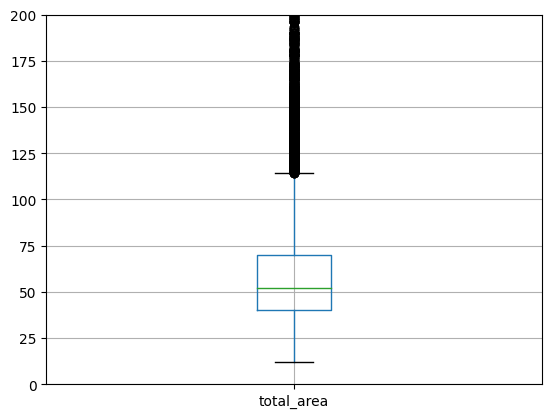

In [61]:
data.boxplot(column='total_area')
plt.ylim(0,200)

(0.0, 400.0)

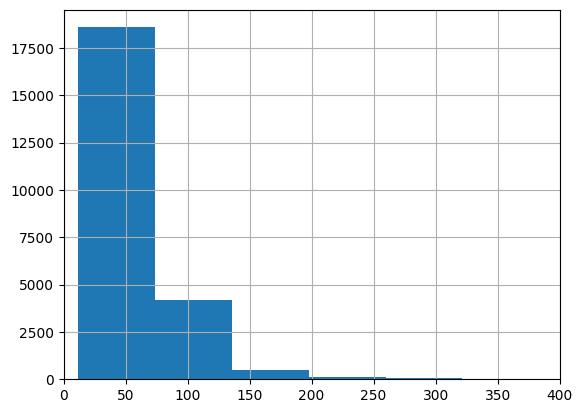

In [62]:
data['total_area'].hist()
plt.xlim(0,400)

Гистограмма и диаграмма размаха демонстрируют, что подавляющее большинство предложений имеет общую площадь до 150 кв.м.

**4.2 Жилая площадь**

In [63]:
data['living_area'].describe()

count    23507.000000
mean        34.265313
std         20.918372
min         10.000000
25%         18.400000
50%         30.300000
75%         42.600000
max        347.500000
Name: living_area, dtype: float64

Разница между средним и медианным значением жилой площади еще меньше, чем у общей площади: 34 и 30 кв.м, соответственно. Это также соответствует одно- и двухкомнатным квартирам.

Минимальное значение: 10 кв.м.

Максимальное значение: 347,5 кв.м.



(0.0, 200.0)

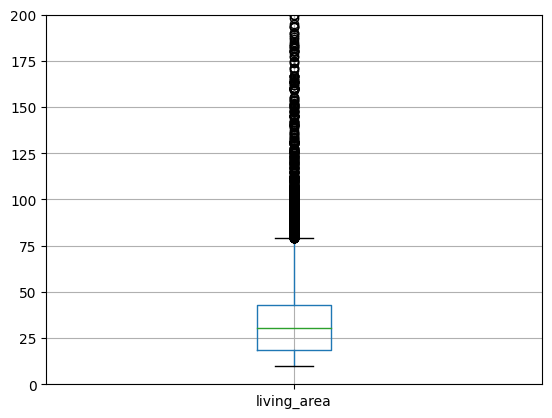

In [64]:
data.boxplot(column='living_area')
plt.ylim(0,200)

<AxesSubplot:>

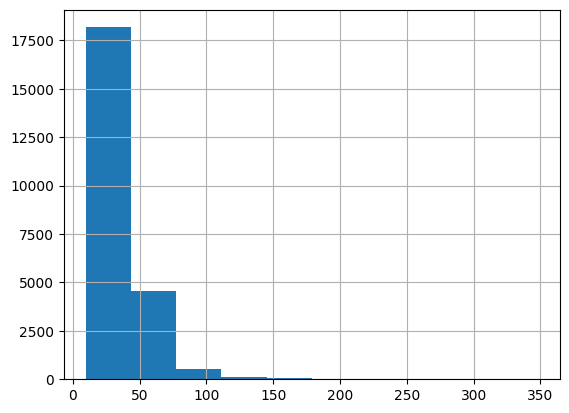

In [65]:
data['living_area'].hist()

Гистограмма и диаграмма размаха демонстрируют, что подавляющее большинство предложений имеет жилую площадь до 75 кв.м.

**4.3 Площадь кухни**

In [66]:
data['kitchen_area'].describe()

count    23507.000000
mean        10.452050
std          5.618777
min          0.000000
25%          7.200000
50%          9.550118
75%         11.515000
max        107.000000
Name: kitchen_area, dtype: float64

Среднее и медианное значения площади кухни составляют 10,45 и 9,55 кв.м, что вполне реалистично. Тем не менее, есть значение вызывающее подозрение - это минимальная площадь, составляющая 0 кв.м. Можно предположить, что это квартиры со свободной планировкой или же студии, для которых не указана площадь кухни. Проверим, так ли это.

In [67]:
len(data[data['kitchen_area']==0])

195

Всего 195 таких строк.

In [68]:
len(data[(data['kitchen_area']==0) & (data['open_plan']==True)])

59

Из них 59 - со свободной планировкой.

In [69]:
len(data[(data['kitchen_area']==0) & (data['open_plan']==False) & (data['studio']==True)])

136

И 136 - студий. 59 + 136 = 195. Все сходится!
Проверим, можем ли мы исправить этот недостаток данных путем замены нулей для студий на медианное значение площади для такого типа жилья? Для свободной планировки нули оставим.

In [70]:
data.loc[data['studio']==True, 'kitchen_area'].describe() #к сожалению, нет. Для всех студий площадь кухни не указана.

count    147.000000
mean       0.714635
std        2.521387
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.550118
Name: kitchen_area, dtype: float64

In [71]:
data.loc[data['rooms']==0, 'kitchen_area'].describe() # студия = отсутствие комнат.
# Но тоже не получится, поскольку размах выдает нулевые значения.

count    195.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: kitchen_area, dtype: float64

Таким образом, оставляем это данные как есть.

(0.0, 40.0)

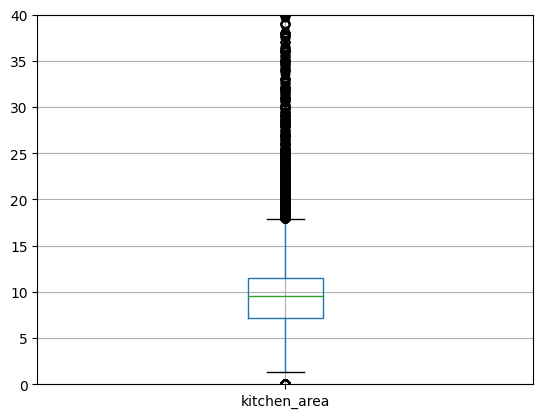

In [72]:
data.boxplot(column='kitchen_area')
plt.ylim(0,40)

<AxesSubplot:>

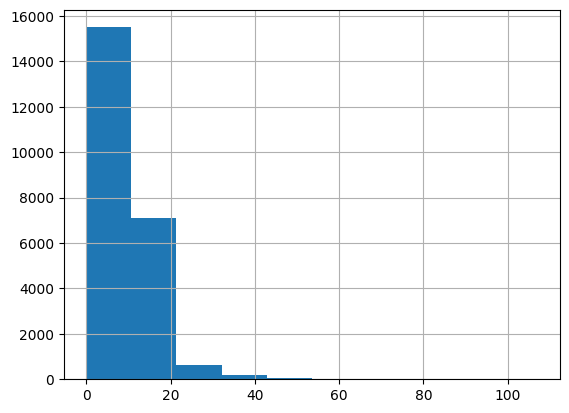

In [73]:
data['kitchen_area'].hist()

Гистограмма и диаграмма размаха демонстрируют, что подавляющее большинство предложений имеет площадь кухни до 20 кв.м.

**4.4 Цена объекта**

In [74]:
data['last_price'].describe()

count    2.350700e+04
mean     6.485562e+06
std      1.040418e+07
min      4.300000e+05
25%      3.417500e+06
50%      4.650000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Средняя цена недвижимости составляет около 6,5 млн.руб, в то время как медиана - 4,65 млн.руб. Скорее всего, такая разница обусловлена огрмной ценой на жилье премиум-сегмента (максимальная цена: 763 млн. руб). 

Минимальная цена составляет 1,22 млн.руб, что может соответствовать студии в пригороде либо комнате.

(0.0, 20000000.0)

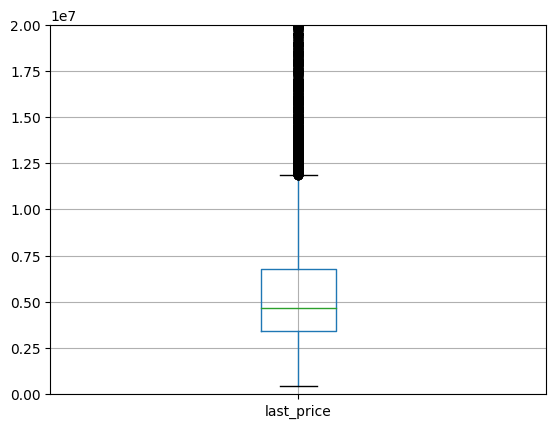

In [75]:
data.boxplot(column='last_price')
plt.ylim(0,20e+06)

<AxesSubplot:>

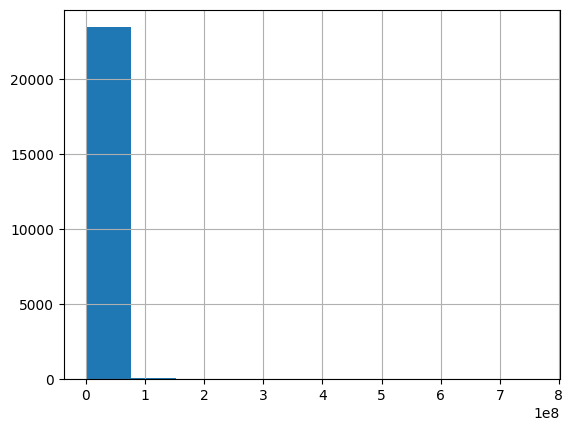

In [76]:
data['last_price'].hist()

Не очень наглядный график, но это потому, что цена - это параметр, который следует рассматривать в зависимости от какого-то другого (например, количество комнат либо площадь).

**4.5 Количество комнат**

In [77]:
data['rooms'].describe()

count    23507.000000
mean         2.060663
std          1.036135
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Все ожидаемо: наиболее популярные двухкомнатные квартиры. Остальные сегменты компенсируют друг друга. Максимальное количество комнат: 7. 

Как мы и выделили на этапе предобработки данных.

<AxesSubplot:>

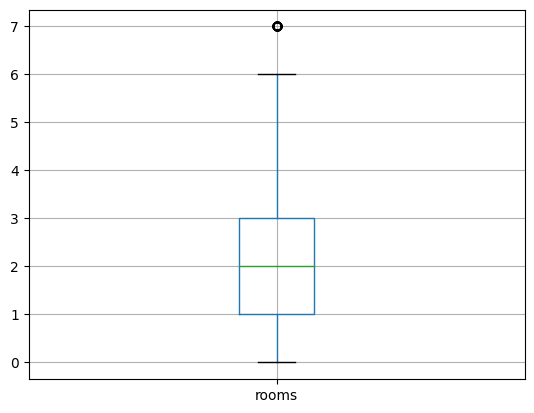

In [78]:
data.boxplot(column='rooms')

<AxesSubplot:>

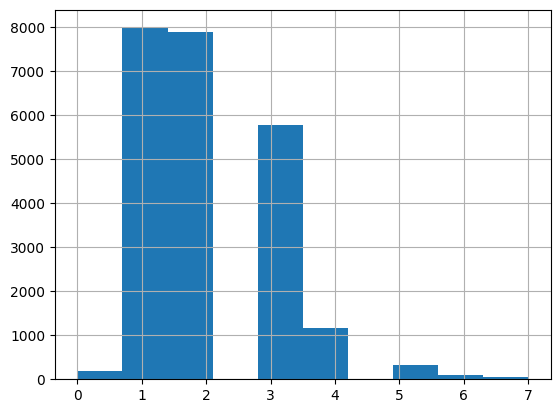

In [79]:
data['rooms'].hist()

Гистограмма подтверждает доводы выше.

**4.6 Высота потолков**

In [80]:
data['ceiling_height'].describe()

count    23507.000000
mean         2.697215
std          0.218652
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

После скрупулезной предобработки данных в части высоты потолков мы получили абсолютно адекватные значения - для абсолютного большинства объектов этот параметр составляет 2,5-2,7 м. 

Максимальное значение: 5,8 м, что может встречаться в премиум-сегменте и в старом фонде.

(2.0, 4.0)

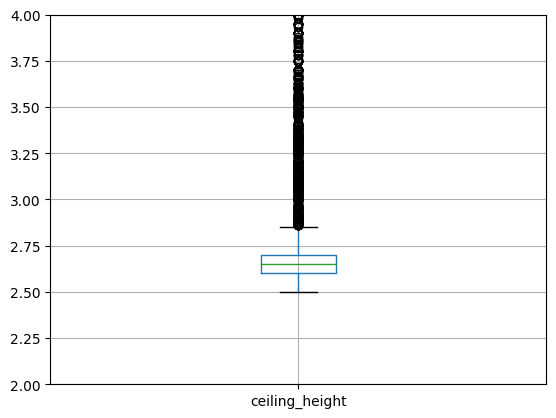

In [81]:
data.boxplot(column='ceiling_height')
plt.ylim(2,4)

<AxesSubplot:>

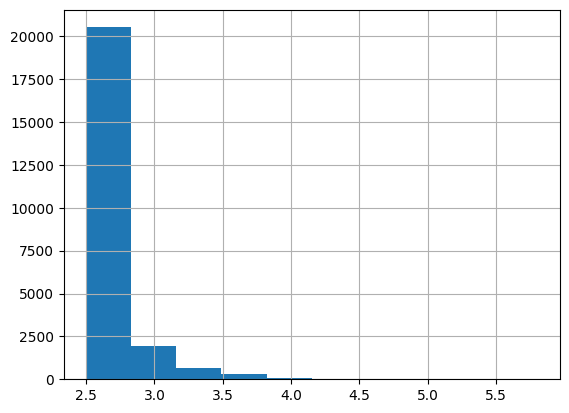

In [82]:
data['ceiling_height'].hist()

**4.7 Этаж квартиры**

In [83]:
data['floor'].describe()

count    23507.000000
mean         5.896031
std          4.883419
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Медианой данного параметра является 4 этаж. И в данном случае именно эта характеристика (а не среднее) является значимой, поскольку это может быть только целое значение.

Минимальное значение: 1 этаж, что логично (если, конечно, мы не говорим о подвалах, переделанных под жилое помещение:) )

Максимальное значение: 33 этаж, что соответствует современной высотной жилой застройке.

(0.0, 40.0)

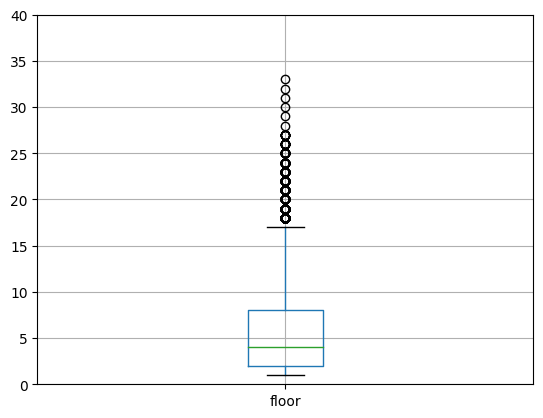

In [84]:
data.boxplot(column='floor')
plt.ylim(0,40)

<AxesSubplot:>

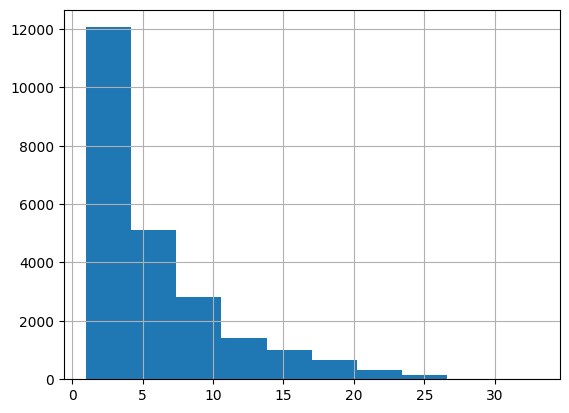

In [85]:
data['floor'].hist()

Гистограмма и диаграмма размаха демонстрируют, что подавляющее большинство предложений - квартиры не выше 10 этажа.

**4.8 Тип этажа квартиры**

In [86]:
data['floor_type'].value_counts()

другой       17315
последний     3326
первый        2866
Name: floor_type, dtype: int64

Меньше всего предложений на первом этаже (2866), затем чуть больше - на последнем (3326), самое большое количество - на иных, кроме уже упомянутых (17315).

<AxesSubplot:>

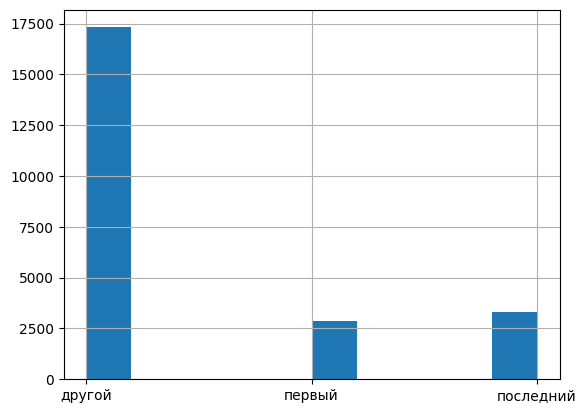

In [87]:
data['floor_type'].hist()

**5.9 Общее количество этаже в доме**

In [88]:
data['floors_total'].describe()

count    23507.000000
mean        10.678224
std          6.571172
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

Медианным значением является 9 этажей, что объяснимо: в спальных районах много девятиэтажек советской застройки и домов близкой этажности.

Максимальная этажность: 36 этажей. Значение вызывает сомнения у меня, как у петербуржца, тем не менее, допустим я чего-то не знаю.

Минимальная этажность: 1 этаж. В датафрейм попали предложения по частной застройке?

(0.0, 40.0)

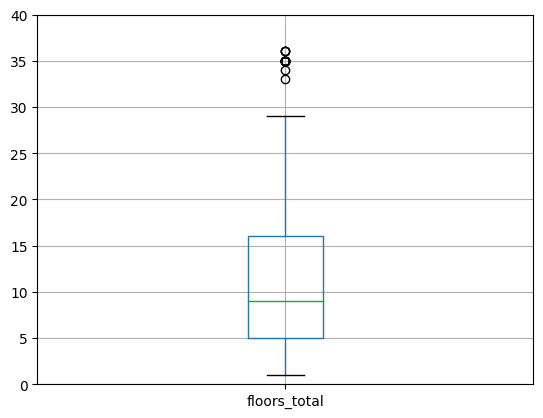

In [89]:
data.boxplot(column='floors_total')
plt.ylim(0,40)

<AxesSubplot:>

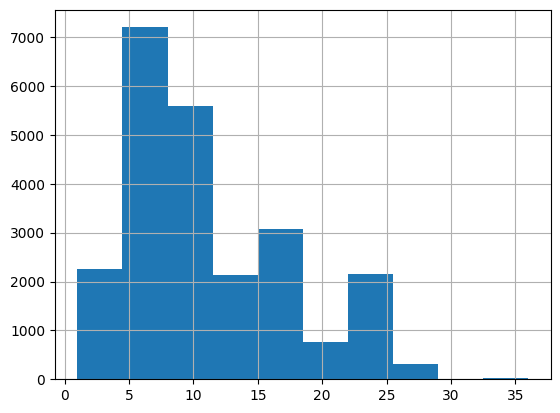

In [90]:
data['floors_total'].hist()

**4.10 Расстояние до центра города в метрах**

In [91]:
data['citycenters_nearest'].describe()

count    18710.000000
mean     14475.415166
std       8592.542395
min        181.000000
25%       9520.500000
50%      13277.000000
75%      16781.250000
max      65968.000000
Name: citycenters_nearest, dtype: float64

Большинство объявлений - это объекты в радиусе 16000 м от центра города, что примерно соответствует расстоянию от окраин спальных районов до исторической части.

Минимальное значение: 181 м, то есть это непосредственно центр города.

Максимальное расстояние: 66000 м - это ближайшие пригороды в Ленинградской области.

<AxesSubplot:>

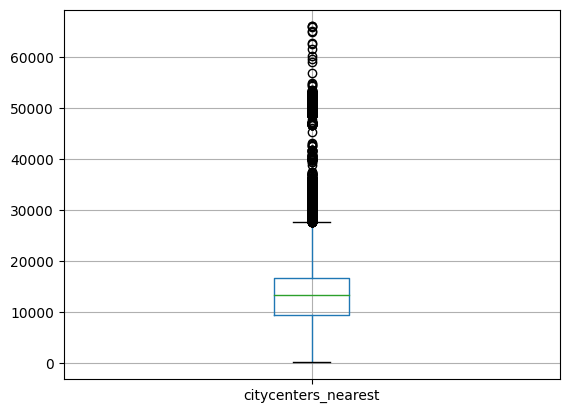

In [92]:
data.boxplot(column='citycenters_nearest')

Диаграмма размаха показывает, что большинство предложений - в радиусе 20 км от центра Санкт-Петербурга.

<AxesSubplot:>

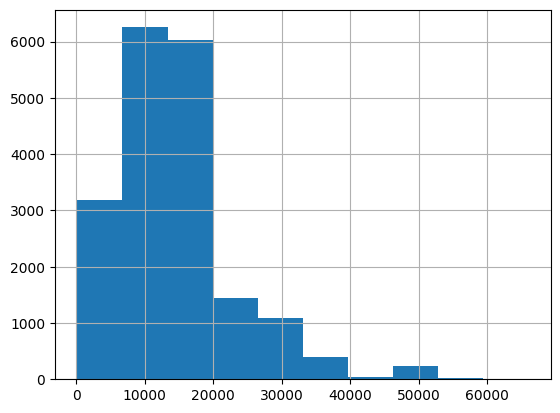

In [93]:
data['citycenters_nearest'].hist()

Гистограмма наглядно показывает, что большая часть объявлений - в Санкт-Петербурге и лишь некоторая - в пригородах.

**4.11 Расстояние до ближайшего аэропорта**

In [94]:
data['airports_nearest'].describe()

count    18710.000000
mean     29565.698249
std      13077.317172
min          0.000000
25%      18796.250000
50%      27427.000000
75%      38832.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Медианное значение составляет 27 км, что реалистично. Однако есть одно подозрительное объявление с объектом, якобы располагающимся непосредственно на территории аэропорта. Возможно, автор указал это значение с целью привлечения внимания. Эту строку следует удалить.

In [95]:
data = data.loc[(data['airports_nearest']!=0) | (data['airports_nearest'].isna())]

In [96]:
data['airports_nearest'].describe()

count    18709.000000
mean     29567.278541
std      13075.880021
min       6450.000000
25%      18797.000000
50%      27428.000000
75%      38832.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Теперь минимум - 6,5 км. Правдиво!

<AxesSubplot:>

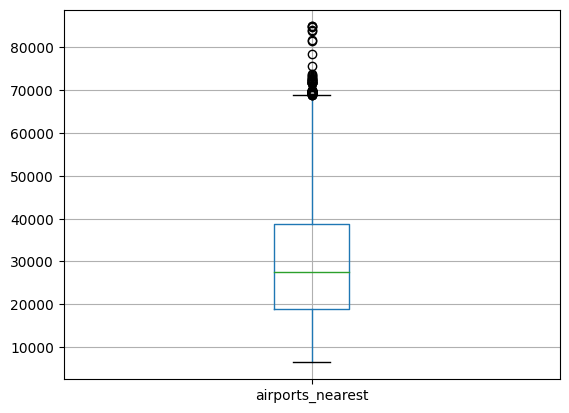

In [97]:
data.boxplot(column='airports_nearest')

Диаграмма размаха показывает, что для большинства объектов ближайший аэропорт располагается в радиусе 40 км.

<AxesSubplot:>

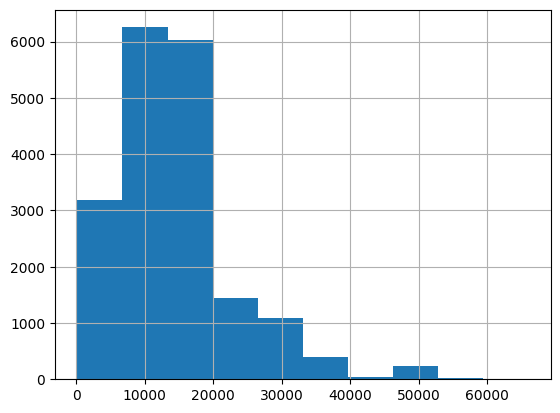

In [98]:
data['citycenters_nearest'].hist()

А по графику можно увидеть, что абсолютное большинство предложений - в радиусе 20 км от аэропорта.

**4.12 Расстояние до ближайшего парка**

In [99]:
data['parks_nearest'].describe()

count    7990.000000
mean      490.686233
std       342.846763
min         1.000000
25%       287.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Оказывается, у большинства объектов парк в шаговой доступности - до 600 м в 70% случаев. Но и здесь есть подозрение на привлечение внимания автором - есть дом, располагающиеся в метре от парка. Удалим все строки, где этот параметр менее 10, но учтем, что у большей части данных этот параметр не указан.

In [100]:
data = data.loc[(data['parks_nearest'] > 10) | data['parks_nearest'].isna()]

In [101]:
data['parks_nearest'].describe()

count    7977.000000
mean      491.472985
std       342.571146
min        11.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

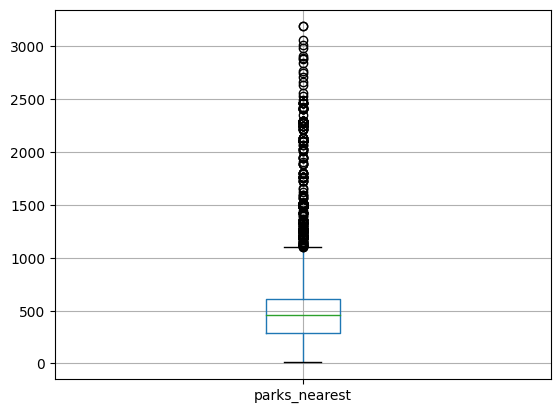

In [102]:
data.boxplot(column='parks_nearest')

<AxesSubplot:>

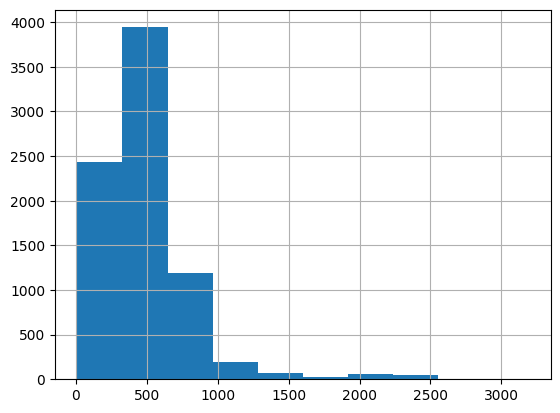

In [103]:
data['parks_nearest'].hist()

По гистограмме можно немного скорректировать вывод: подавляющее большинство объектов располагается в радиусе 1 км от ближайшего парка.

**4.13 День и месяц публикации объявления**

In [104]:
weekday_pivot = data.pivot_table(index = 'weekday_exposition',values='first_day_exposition',aggfunc=['count'])
weekday_pivot.columns = ['count']
weekday_pivot.sort_values('count', ascending=False)

,count
weekday_exposition,
четверг,4254
вторник,4148
пятница,3975
среда,3937
понедельник,3579
суббота,1925
воскресение,1675


<AxesSubplot:xlabel='weekday_exposition'>

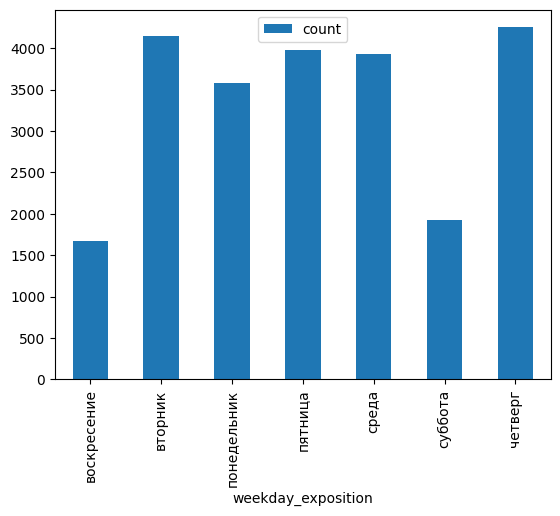

In [105]:
weekday_pivot.plot(y='count',kind='bar')
#month_pivot.plot(y='count',kind='pie',figsize=(8,8))

Вполне ожидаемо, что большинство объявлений опубликованы в рабочие дни. Пик приходится на вторник и четверг.

In [106]:
month_pivot = data.pivot_table(index = 'month_exposition',values='first_day_exposition',aggfunc=['count'])
month_pivot.columns = ['count']
month_pivot.sort_values('count', ascending=False)

,count
month_exposition,
февраль,2617
март,2566
апрель,2358
ноябрь,2352
октябрь,2109
сентябрь,1968
июнь,1743
август,1733
июль,1676


<AxesSubplot:xlabel='month_exposition'>

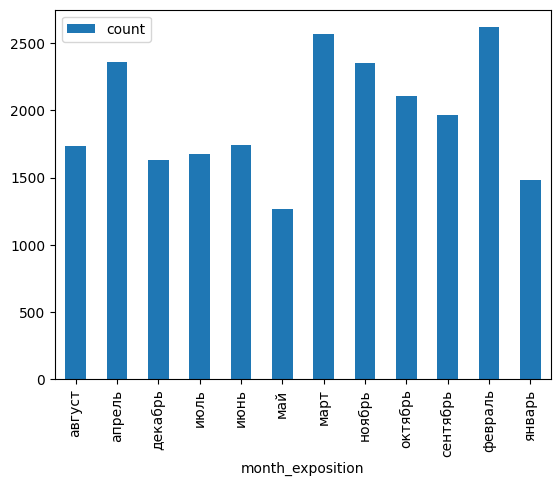

In [107]:
month_pivot.plot(y='count',kind='bar')

Тоже ожидаемо, что пик публикаций приходится на конец зимы - начало весны и на осень. В сезон отпусков и в преддверии зимних праздников мало кто решает вопросы с недвижимостью.

**4.14 Как быстро продавались квартиры**

<AxesSubplot:>

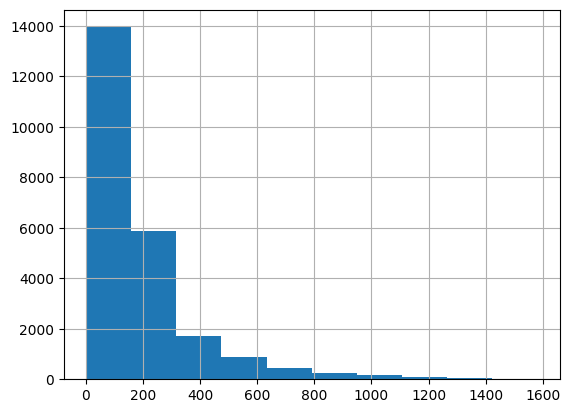

In [108]:
data['days_exposition'].hist()

In [109]:
data['days_exposition'].describe()

count    23493.000000
mean       181.827438
std        204.866078
min          1.000000
25%         45.000000
50%        124.000000
75%        211.000000
max       1580.000000
Name: days_exposition, dtype: float64

Медиана срока размещения объявления составляет 4 месяца, среднее - 5 месяцев. 

Интерес вызывает минимальный срок размещения - 1 день. Можно предположить, что это либо редкая удача для риелтора/продавца, либо ошибочно размещенное объявление, либо в датафрейме есть дубликаты, которые по имеющимся данным выявить не представляется возможным - отсутствует ID автора.

Максимальный срок размещения составляет 4 года. Можно предположить, что это жилье премиум-сегмента (примем, что премиум-сегмент - это цена выше 10 млн).

In [110]:
data[data['days_exposition']>1500] #проверяем гипотезу

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,citycenters_nearest_km
1109,1,34878556,95.80,2014-12-09,2,2.65,6,58.30,5,True,...,160.0,3,569.0,1572,364076.784969,вторник,декабрь,2014,другой,0.0
1885,2,13300000,79.60,2014-12-09,2,3.00,8,42.70,7,False,...,537.0,0,NaN,1513,167085.427136,вторник,декабрь,2014,другой,11.0
6691,3,4400000,42.98,2014-12-12,1,2.65,5,18.72,1,False,...,439.0,3,232.0,1512,102373.196836,пятница,декабрь,2014,первый,30.0
9553,11,10600000,80.00,2014-12-09,3,2.85,17,44.00,9,False,...,NaN,0,NaN,1553,132500.000000,вторник,декабрь,2014,другой,17.0
18843,11,3500000,48.20,2014-12-15,2,2.50,5,27.40,2,False,...,NaN,0,NaN,1580,72614.107884,понедельник,декабрь,2014,другой,NaN
20969,18,13300000,133.00,2015-02-11,4,3.00,5,58.00,2,False,...,NaN,1,534.0,1512,100000.000000,среда,февраль,2015,другой,5.0


Гипотеза не подтвердилась: в срезе только одно объявление премиум-сегмента, и максимальный срок размещения относится не к нему.

Посмотрим, есть ли корреляция между сроком размещения и ценой.

In [111]:
data['days_exposition'].corr(data['last_price'])

0.08402711082542962

Нет, эти параметры не связаны. А может есть связь с общей площадью?

In [112]:
data['days_exposition'].corr(data['total_area']) #а может есть связь с площадью?

0.15135331007479474

Тоже довольно слабая. Что насчет отсутствия фотографий объекта?

In [113]:
data['days_exposition'].corr(data['total_images'])

-0.021940734086479445

Тоже нет. А может эти объекты расположены далеко за городом?

In [114]:
new = data[data['days_exposition']>1500]
new[['days_exposition','locality_name']]

,days_exposition,locality_name
1109,1572,Санкт-Петербург
1885,1513,Санкт-Петербург
6691,1512,Пушкин
9553,1553,Санкт-Петербург
18843,1580,Новое Девяткино
20969,1512,Санкт-Петербург


Не подтверждается. А есть ли связь между сроком размещения и статусом "апартаменты"?

In [115]:
new2 = data[data['is_apartment']==True]
new2['days_exposition'].unique()

array([ 173,  179, 1572,   13,    7,  273,   96,   60,  158,   22,  204,
          6,  126,  635,  278,   44, 1067, 1078,  172,   34, 1030,   46,
          8,   30,   50,  114,  337,  869,   56,  113,  388,  165,  767,
         12,   27])

Определенно, в срезе есть объявления с очень долгим сроком размещения, но однозначный вывод и здесь нельзя сделать.

Проверим, может быть покупатели стороняться квартир на первом этаже?

In [116]:
new3 = data[data['floor_type']=='последний']
new3['days_exposition'].unique()

array([  90,  366,  615,  139,  763,  277,  336,  609,  143,  194,  463,
         65,   34,  122, 1048,  426,  394,  163,  158,   60,   55,   75,
         62,   98,  228,  204,   46,   20,  276,  253,  119,  586,   31,
        219,  564,   21,   93,  443,  173,   81,  179,  172,  247,   61,
         72,   12,   45,  183,  635,  103,  508,    4,  703,   44,   22,
        722,   28,  654,  114, 1273,   19,  240,  429,  638,   35,   40,
         58,  613,   17,   97,  485,  246,  383,  197,  306,  381,  307,
        365,  667,   63, 1002,  574,  611,  176,  360,   64,  132,  765,
        249,   30,   10,  116,  658,  160,  637,  283,  419,  338,   73,
        113, 1069,  118,  314,  149,  106,  499,   36,  104,  182,  342,
         42,   79,   49,   51,   82,  102,   92,  585,  832,   86,  285,
        704,  343,  130,  719,  300,  170,   11,  346,  245,  216,   26,
        157,  212,  317,  156,  238,  166,  174, 1283,  164,    9,    7,
         41,    6,  560, 1228,  305,   67,  362,  3

Не подтверждается.

Как таковой взаимосвязи срока размещения с другими параметрами обнаружить не удалось. Скорее всего, здесь оказывает влияние какой-то третий фактор - им может быть компетенция риелтора.

In [117]:
data[data['days_exposition']<30].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sqm,year_exposition,citycenters_nearest_km
count,3511.000000,3.511000e+03,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,3511.000000,2981.000000,2981.000000,3511.000000,1194.000000,3511.000000,1345.000000,3511.000000,3511.000000,3511.000000,2981.000000
mean,9.627457,5.473807e+06,53.314457,1.853603,2.672979,11.288522,30.224692,6.192538,9.675352,0.640843,29492.649586,14722.807531,0.455995,477.951424,0.559670,537.136059,15.009969,99358.536695,2017.801481,14.727608
std,5.879239,5.788799e+06,28.760774,0.948045,0.191520,6.465044,17.940461,4.800636,5.018169,0.955432,13446.582272,7972.181505,0.724215,316.094630,0.838063,275.780675,7.903453,37674.739131,0.743564,7.973800
min,0.000000,5.300000e+05,13.000000,0.000000,2.500000,1.000000,10.000000,1.000000,0.000000,0.000000,6450.000000,318.000000,0.000000,11.000000,0.000000,24.000000,1.000000,12724.550898,2016.000000,0.000000
25%,5.000000,3.400000e+06,37.000000,1.000000,2.600000,5.000000,18.000000,3.000000,7.000000,0.000000,17860.000000,10718.000000,0.000000,283.250000,0.000000,319.000000,8.000000,80937.599790,2017.000000,11.000000
50%,9.000000,4.400000e+06,46.000000,2.000000,2.650000,9.000000,28.000000,5.000000,9.000000,0.000000,28036.000000,13606.000000,0.000000,455.000000,0.000000,540.000000,14.000000,96103.896104,2018.000000,14.000000
75%,14.000000,5.990000e+06,61.350000,2.000000,2.650000,16.000000,37.000000,8.000000,11.000000,1.000000,39330.000000,16608.000000,1.000000,600.500000,1.000000,751.000000,22.000000,113071.523430,2018.000000,17.000000
max,50.000000,1.600000e+08,495.000000,7.000000,5.300000,36.000000,347.500000,33.000000,107.000000,5.000000,81607.000000,62706.000000,3.000000,3064.000000,3.000000,1299.000000,29.000000,658436.213992,2019.000000,63.000000


В целом можно утверждать, что быстрее всего (в течение 1 месяца) продаются двухкомнатные квартиры площадью до 60 кв.м, расположенные в спальных районах Санкт-Петербурга (в радиусе 16 км от центра). Для большинства предложений цена варьируется от 4 до 6 млн.руб, что соответствовало рынку на момент размещения объявлений (2017-2018 гг).

**4.15 Какие факторы больше всего влияют на общую (полную) стоимость объекта**

***4.15.1 Зависимость цены от общей площади***

Создадим сводную таблицу цены и медианного значения общей площади для таких цен.

In [118]:
price_totalarea_pivot = data.pivot_table(index = 'last_price',values='total_area',aggfunc=['median'])
price_totalarea_pivot.columns = ['median']
price_totalarea_pivot = price_totalarea_pivot.reset_index()
price_totalarea_pivot

,last_price,median
0,430000,42.20
1,440000,40.00
2,450000,40.25
3,470000,41.00
4,480000,32.00
...,...,...
2940,289238400,187.50
2941,300000000,618.00
2942,330000000,190.00
2943,401300000,401.00


<AxesSubplot:xlabel='median', ylabel='last_price'>

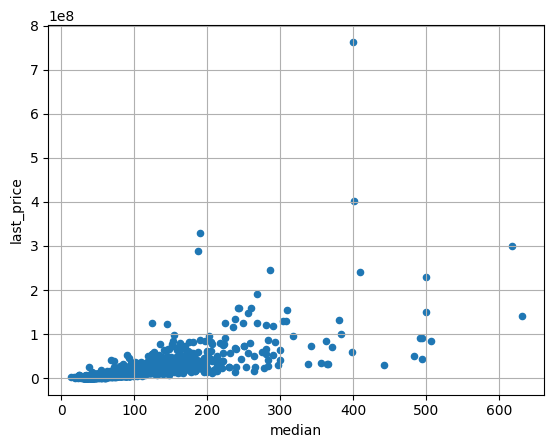

In [119]:
price_totalarea_pivot.plot(x='median',y='last_price',kind='scatter',grid=True)
#plt.xlim(0,300)

In [120]:
price_totalarea_pivot['last_price'].corr(price_totalarea_pivot['median'])

0.6667753071317747

Диаграмма рассеяния и коэффициент корреляции наглядно показывают, что зависимость цены от общей площади объекта довольно значительная. Впрочем это вполне ожидаемый результат.

***4.15.2 Зависимость цены от жилой площади***

Создадим сводную таблицу цены и медианного значения жилой площади для таких цен.

In [121]:
price_livingarea_pivot = data.pivot_table(index = 'last_price',values='living_area',aggfunc=['median'])
price_livingarea_pivot.columns = ['median']
price_livingarea_pivot = price_livingarea_pivot.reset_index()
price_livingarea_pivot

,last_price,median
0,430000,23.868425
1,440000,17.893552
2,450000,26.650000
3,470000,28.000000
4,480000,16.000000
...,...,...
2940,289238400,63.700000
2941,300000000,258.000000
2942,330000000,95.000000
2943,401300000,204.000000


<AxesSubplot:xlabel='median', ylabel='last_price'>

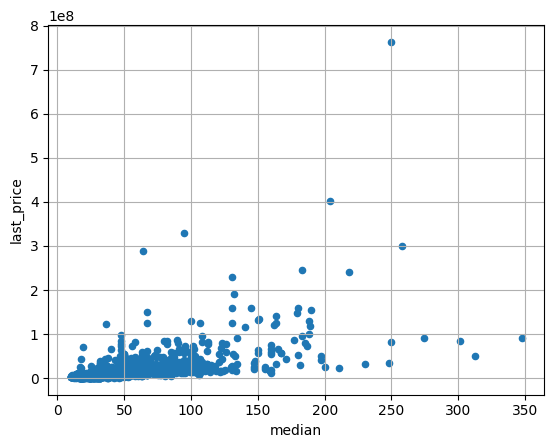

In [122]:
price_livingarea_pivot.plot(x='median',y='last_price',kind='scatter',grid=True)
#plt.xlim(0,200)

In [123]:
price_livingarea_pivot['last_price'].corr(price_livingarea_pivot['median'])

0.6001999424928081

Диаграмма рассеяния и коэффициент корреляции наглядно показывают, что зависимость цены от жилой площади объекта также довольно значительная. И это тоже вполне ожидаемый результат.

***4.15.3 Зависимость цены от площади кухни***

Создадим сводную таблицу цены и медианного значения площади кухни для таких цен.

In [124]:
price_kitchenarea_pivot = data.pivot_table(index = 'last_price',values='kitchen_area',aggfunc=['median'])
price_kitchenarea_pivot.columns = ['median']
price_kitchenarea_pivot = price_kitchenarea_pivot.reset_index()
price_kitchenarea_pivot

,last_price,median
0,430000,7.989792
1,440000,9.550118
2,450000,7.150000
3,470000,9.000000
4,480000,9.550118
...,...,...
2940,289238400,30.200000
2941,300000000,70.000000
2942,330000000,40.000000
2943,401300000,24.000000


<AxesSubplot:xlabel='median', ylabel='last_price'>

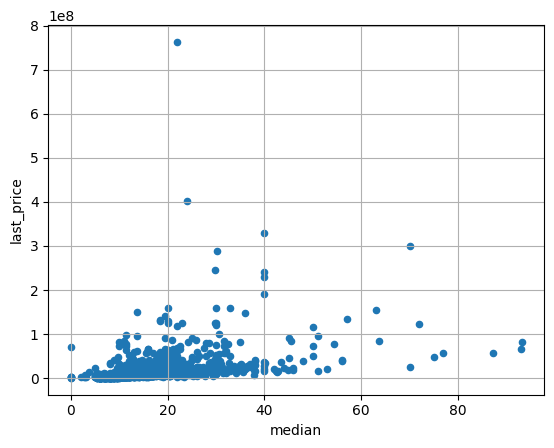

In [125]:
price_kitchenarea_pivot.plot(x='median',y='last_price',kind='scatter',grid=True)
#plt.xlim(0,60)

In [126]:
price_kitchenarea_pivot['last_price'].corr(price_kitchenarea_pivot['median'])

0.4533466198412289

Хотя визуально по диаграмме рассеяния кажется, что характер зависимости цены от площади кухни похож на два предыдущих параметра, коэффициент корреляции говорит нам о том, что, хотя зависимость и есть, она заметно ниже, чем в п.4.15.1 и п.4.15.2.

***4.15.4 Зависимость цены от количества комнат***

Создадим сводную таблицу, в которой сгруппируем медианное значение цен в зависимости от количества комнат и количество предложений на объекты с таким количеством комнат.

In [127]:
price_rooms_pivot = data.groupby('rooms').agg({'last_price':['median'],'rooms':['count']})
price_rooms_pivot = price_rooms_pivot.reset_index()
price_rooms_pivot.columns = ['rooms','price_median','offer_count']
price_rooms_pivot

,rooms,price_median,offer_count
0,0,2730000,195
1,1,3600000,7990
2,2,4790000,7872
3,3,6200000,5776
4,4,9000000,1170
5,5,14000000,326
6,6,19000000,105
7,7,24900000,59


<AxesSubplot:xlabel='rooms'>

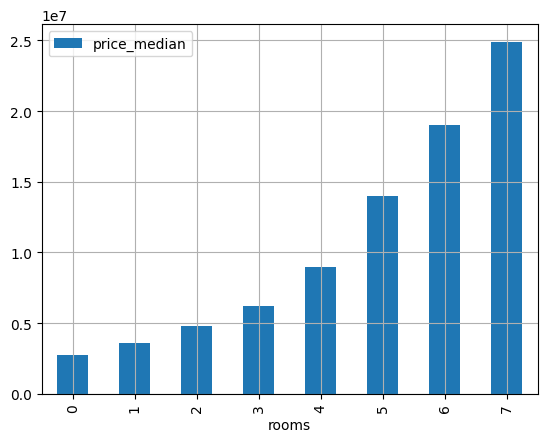

In [128]:
price_rooms_pivot.plot(x='rooms',y='price_median',kind='bar',grid=True)

In [129]:
price_rooms_pivot['price_median'].corr(price_rooms_pivot['rooms'])

0.9517816628931267

Зависимость цены от количества комнат имеет практически линейный характер - более чем ожидаемый результат!

***4.15.5 Зависимость цены от типа этажа***

Создадим сводную таблицу, в которой сгруппируем медианное значение цен в зависимости от количества комнат и количество предложений на объекты с таким количеством комнат.

In [130]:
price_floortype_pivot = data.groupby('floor_type').agg({'last_price':['median'],'floor_type':['count']})
price_floortype_pivot = price_floortype_pivot.reset_index()
price_floortype_pivot.columns = ['floor_type','price_median','offer_count']
price_floortype_pivot

,floor_type,price_median,offer_count
0,другой,4850000,17304
1,первый,3900000,2865
2,последний,4300000,3324


<AxesSubplot:xlabel='floor_type'>

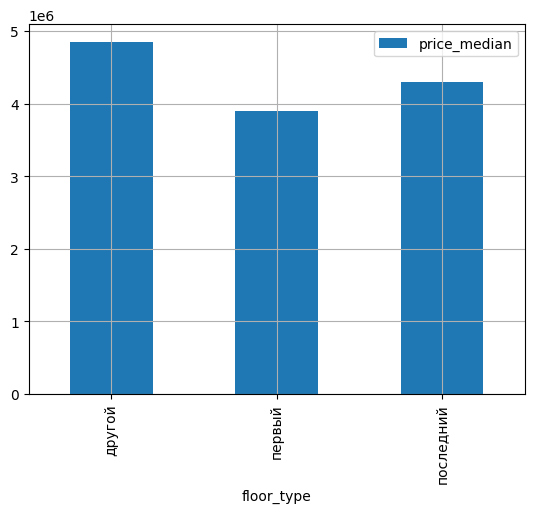

In [131]:
price_floortype_pivot.plot(x='floor_type',y='price_median',kind='bar',grid=True)

Гистограмма демонстрирует, что покупатели ценят квартиры на любом другом этаже, нежели первом. В этот вывод не укладывается то, что медианное значение для недвижимости на последнем этаже - самое низкое. Однако в данном случае этот факт не следует учитывать, потому что в датафрейме крайне мало таких предложений в сравнении с двумя другими группами.

***4.15.6 Зависимость цены от даты размещения (день недели, месяц, год)***

Создадим сводную таблицу, в которой сгруппируем медианное значение цен в зависимости от дня недели и количество предложений на объекты с таким днем недели.

In [132]:
price_weekday_pivot = data.groupby('weekday_exposition').agg({'last_price':['median'],'weekday_exposition':['count']})
price_weekday_pivot = price_weekday_pivot.reset_index()
price_weekday_pivot.columns = ['weekday_exposition','price_median','offer_count']
price_weekday_pivot

,weekday_exposition,price_median,offer_count
0,воскресение,4550000,1675
1,вторник,4700000,4148
2,понедельник,4650000,3579
3,пятница,4580000,3975
4,среда,4700000,3937
5,суббота,4550000,1925
6,четверг,4650000,4254


<AxesSubplot:xlabel='weekday_exposition'>

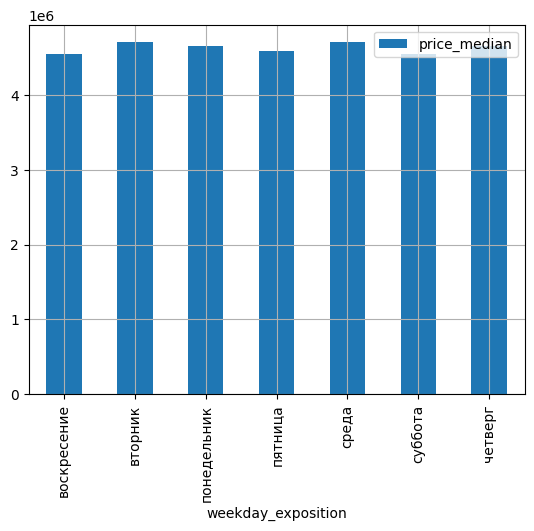

In [133]:
price_weekday_pivot.plot(x='weekday_exposition',y='price_median',kind='bar',grid=True)

Гистограмма показывает, что никакой связи между ценой и днем недели публикации объявления нет.

Создадим сводную таблицу, в которой сгруппируем медианное значение цен в зависимости от месяца публикации и количество предложений на объекты с таким месяцем публикации.

In [134]:
price_month_pivot = data.groupby('month_exposition').agg({'last_price':['median'],'weekday_exposition':['count']})
price_month_pivot = price_month_pivot.reset_index()
price_month_pivot.columns = ['month_exposition','price_median','offer_count']
price_month_pivot

,month_exposition,price_median,offer_count
0,август,4590000,1733
1,апрель,4800000,2358
2,декабрь,4700000,1628
3,июль,4650000,1676
4,июнь,4400000,1743
5,май,4515000,1264
6,март,4650000,2566
7,ноябрь,4700000,2352
8,октябрь,4570000,2109
9,сентябрь,4700000,1968


<AxesSubplot:xlabel='month_exposition'>

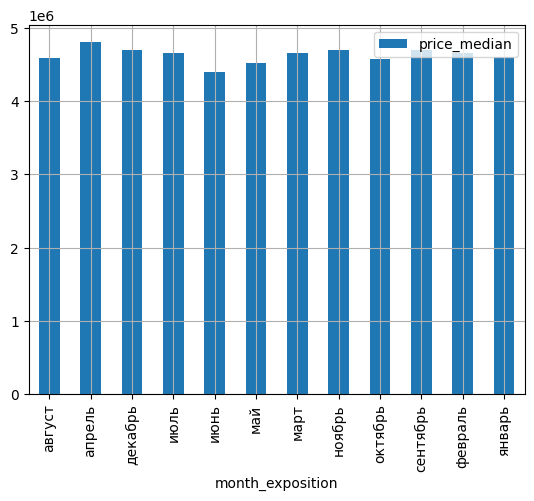

In [135]:
price_month_pivot.plot(x='month_exposition',y='price_median',kind='bar',grid=True)

Аналогично - связь отсутствует.

Создадим сводную таблицу, в которой сгруппируем медианное значение цен в зависимости от года публикации и количество предложений на объекты с таким годом публикации. Для более полного представления добавим в таблицу столбец с медианным значением общей площади квартир по каждому году.

In [136]:
price_year_pivot = ( data.groupby('year_exposition').agg({'last_price':['median'],'total_area':['median'],
                                                        'year_exposition':['count']}) )
price_year_pivot = price_year_pivot.reset_index()
price_year_pivot.columns = ['year_exposition','price_median','total_area_median','offer_count']
price_year_pivot

,year_exposition,price_median,total_area_median,offer_count
0,2014,7640000,76.18,136
1,2015,5301000,60.00,1165
2,2016,4500000,53.00,2747
3,2017,4500000,52.00,8132
4,2018,4575000,50.50,8451
5,2019,5050000,51.95,2862


<AxesSubplot:xlabel='year_exposition'>

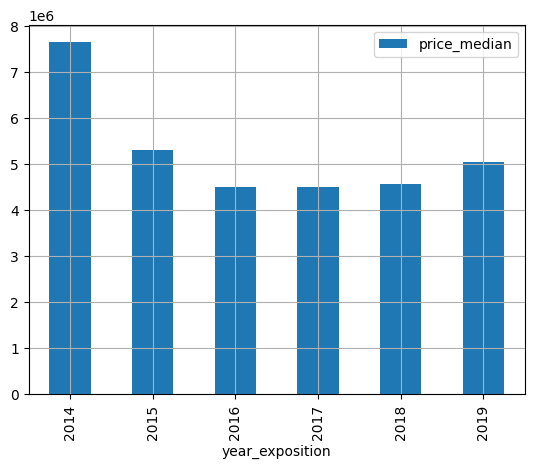

In [137]:
price_year_pivot.plot(x='year_exposition',y='price_median',kind='bar',grid=True)

<AxesSubplot:xlabel='year_exposition'>

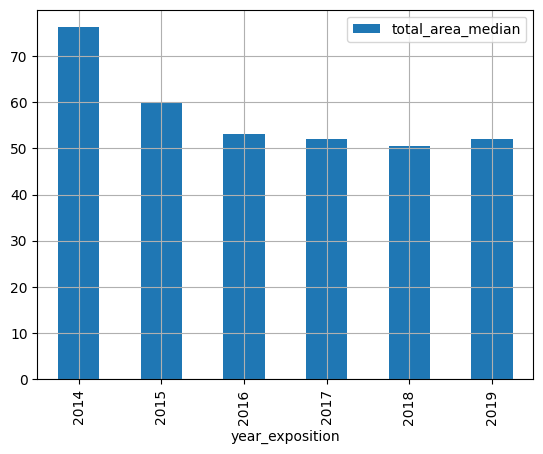

In [138]:
price_year_pivot.plot(x='year_exposition',y='total_area_median',kind='bar',grid=True)

При поверхностном рассмотрении может сложиться впечатление, что на рынке, начиная с 2014 года, наблюдается значительный спад цен. На самом деле это не так, если мы посмотрим на количество предложений - в датафрейм попало очень маленькое количество объявлений, размещенных в 2014 году, в сравнении с последующими годами. Кроме того в период с 2014 по 2019 гг заметно падала медиана общей площади. При этом с 2016 года наблюдался постепенный рост медианы стоимости жилья.Таким образом, можно сделать вывод о том, что - наоборот - цена росла с каждым годом.

***4.16 Средняя цена одного квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений***

Создадим сводную таблицу, в которой сначала сгруппируем строки по населенному пункту и посчитаем количество объявлений и средние значения общей площади и цены. Затем добавим столбец со средней ценой квадратного метра.

In [139]:
locality_price_pivot = data.groupby('locality_name').agg({'total_area':['median'],'last_price':['median','count']})
locality_price_pivot = locality_price_pivot.reset_index()
locality_price_pivot.columns = ['locality_name','total_area','last_price','offer_count']
locality_price_pivot['sqm_median_price'] = round((locality_price_pivot['last_price'] / locality_price_pivot['total_area']),0)
locality_price_pivot = locality_price_pivot.sort_values(by='offer_count',ascending=False)
locality_price_pivot.head(10)

,locality_name,total_area,last_price,offer_count,sqm_median_price
220,Санкт-Петербург,55.0,5500000.0,15613,100000.0
143,Мурино,37.5,3400000.0,589,90667.0
104,Кудрово,40.0,3890000.0,471,97250.0
293,Шушары,50.0,3950000.0,439,79000.0
34,Всеволожск,53.5,3450000.0,397,64486.0
199,Пушкин,53.5,5187319.0,366,96959.0
88,Колпино,50.0,3600000.0,336,72000.0
167,Парголово,43.0,4115000.0,326,95698.0
42,Гатчина,45.0,3100000.0,307,68889.0
35,Выборг,50.2,2900000.0,235,57769.0


Результат ожидаем: самая высокая цена за квадратный метр в Санкт-Петербурге, где больше всего предложений. Далее идут пригороды, которые почти являются частью города: Мурино, Кудрово, Шушары, Всеволожск; или непосредсвтенно включены в состав Санкт-Петербурга: Пушкин, Колпино, парголово, Гатчина. На их фоне примечательно, что замыкает десятку Выборг, который распологается в Ленинградской области на заметном удалении от города.

In [140]:
locality_price_pivot[locality_price_pivot['sqm_median_price']==locality_price_pivot['sqm_median_price'].max()]

,locality_name,total_area,last_price,offer_count,sqm_median_price
220,Санкт-Петербург,55.0,5500000.0,15613,100000.0


In [141]:
locality_price_pivot[locality_price_pivot['sqm_median_price']==locality_price_pivot['sqm_median_price'].min()]

,locality_name,total_area,last_price,offer_count,sqm_median_price
247,Старополье,40.0,450000.0,3,11250.0


Самая низкая цена за квадратный метр - в местечке Старополье в Ленинградской области.

***4.17 Средняя цена каждого километра до центра Санкт-Петербурга (расчет только для предложений в городе)***

In [142]:
price_per_km_pivot = ( data[(data['locality_name']=='Санкт-Петербург') & data['citycenters_nearest_km'].notna() 
                          & (data['citycenters_nearest_km']!=0)] )
price_per_km_pivot = price_per_km_pivot[['last_price','citycenters_nearest_km']]
price_per_km_pivot = price_per_km_pivot.groupby('citycenters_nearest_km').agg({'last_price':['mean']}).reset_index()
price_per_km_pivot.columns = ['citycenters_nearest_km','mean_price_per_km']
price_per_km_pivot

,citycenters_nearest_km,mean_price_per_km
0,1.0,2.113948e+07
1,2.0,1.770137e+07
2,3.0,1.090635e+07
3,4.0,1.302708e+07
4,5.0,1.442147e+07
5,6.0,1.489794e+07
6,7.0,1.479526e+07
7,8.0,9.146406e+06
8,9.0,6.983773e+06
9,10.0,6.422527e+06


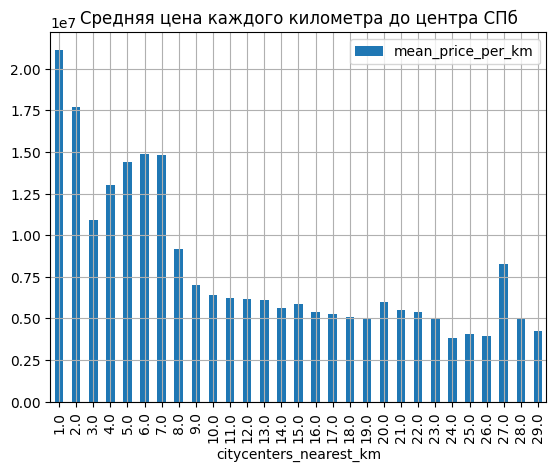

In [143]:
price_per_km_pivot.plot(x='citycenters_nearest_km',y='mean_price_per_km',kind='bar',grid=True, 
                        title = 'Средняя цена каждого километра до центра СПб');

In [144]:
price_per_km_pivot['mean_price_per_km'].corr(price_per_km_pivot['citycenters_nearest_km'])

-0.7868332692039652

Результат прогнозируем: с каждым километром от центра города цена падает. Есть локальные колебания, которые, скорее всего, связаны с меньшим количеством предложений в той или иной группе километража.

Данная зависимость имеет высокую корреляцию, а значит ее характер приближен к линейному.

### Общий вывод

В ходе исследования была проведена предварительная обработка данных: удалены или заполнены пропуски, где это представлялось возможным, удалены аномальные значения, выполнена проверка на явные и неявные дубликаты. Затем выполнены предварительные расчеты, необходимые для исследования.

Проведенное исследование данных по объявлениям о продаже недвижимости в г.Санкт-Петербурге и Ленинградской области за 2014-2019 гг выявило следующее:
- в выборку попали объявления с некорректными данными по высоте потолков, количеству комнат, этажей и этажности, жилой площади и цене. В каких-то случаях ошибки, скорее всего, связаны с некорректно/невнимательно заполненными полями, в каких-то - это намеренное привлечение внимания автором к своему объявлению. Такие строки были устранены;
- для оставшегося после предобработки среза все основные параметры - общая и жилая площадь, площадь кухни, цена, количество комнат, высота потолков, этаж квартиры и этажность дома, расстояние до центра города/до ближайшего аэропорта/до ближайшего парка, а также день и месяц публикации объявления - оказались в пределах ожидаемых значений;
- быстрее всего (в течение 1 месяца) продаются двухкомнатные квартиры площадью до 60 кв.м, расположенные в спальных районах Санкт-Петербурга (в радиусе 16 км от центра). По наиболее медленным продажам однозначный вывод сделать не представляется возможным;
- в целом большинство сделок происходит в течение 3-4 месяцев;
- наиболее активный период на рынке: конец зимы-начало весны и осень.
- цена сильно зависит от общей и жилой площади объекта, умеренно - от площади кухни;
- зависимость цены от количества комнат носит почти линейный характер;
- на цену не оказывает влияние дата размещения объекта;
- цена квартир на первых этажах ожидаемо ниже, чем в других категориях;
- самая низкая цена за квадратный метр обнаружена в местечке Старополье в Ленинградской области, самая высокая - ожидаемо в Санкт-Петербурге;
- с каждым километром от исторического центра стоимость квадратного метра в Санкт-Петербурге стремительно падает;
- это не очень очевидно на первый взгляд, но с каждым годом рассматриваемого периода цена жилья росла, но это скрыто за уменьшением общей площади. Кроме того, количество объявлений за 2014 и 2019 год заметно меньше, чем за другие года.